In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import random

In [2]:
from tensorflow.keras.datasets import cifar10

**Loading the test set and trainig set and Print the shape of data**

In [3]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()
print(f"train_X: {train_X.shape}, test_X: {test_X.shape}")
print(f"train_y: {train_y.shape},test_Y: {test_y.shape}")

train_X: (50000, 32, 32, 3), test_X: (10000, 32, 32, 3)
train_y: (50000, 1),test_Y: (10000, 1)


## Print one image matrix (We have 32*32*3 matrix per image)

In [4]:
train_X[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Map the classes with labels in the dataset

In [5]:
classes = {0: 'airplane',1: 'automobile',2: 'bird',3: 'cat',4: 'deer',5: 'dog',6: 'frog',7: 'horse',8: 'ship',9:'truck'}
def printImage(imageMatrix,label_val):
  plt.figure(figsize=(5,2))
  plt.imshow(imageMatrix)
  plt.xlabel(classes[label_val])

## Print first Image

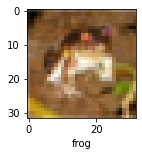

In [6]:
printImage(train_X[0],train_y[0][0])

## Print 2 random images per category

Get 2 random indexes for each class

In [7]:
train_data_label_indices = []
for i in range(10):
    train_data_label_indices.append([])
for i in range(len(train_y)):
    train_data_label_indices[train_y[i][0]].append(i)
for i in range(10):
    index1 = random.randint(0, len(train_data_label_indices[i])-1)
    index2 = random.randint(0, len(train_data_label_indices[i])-1)
    train_data_label_indices[i] = [train_data_label_indices[i][index1],train_data_label_indices[i][index2]]
print(train_data_label_indices)

[[19753, 23978], [45675, 39549], [9350, 820], [6555, 29322], [13815, 24241], [12682, 35989], [20597, 19732], [44514, 4318], [14854, 49191], [46774, 30194]]


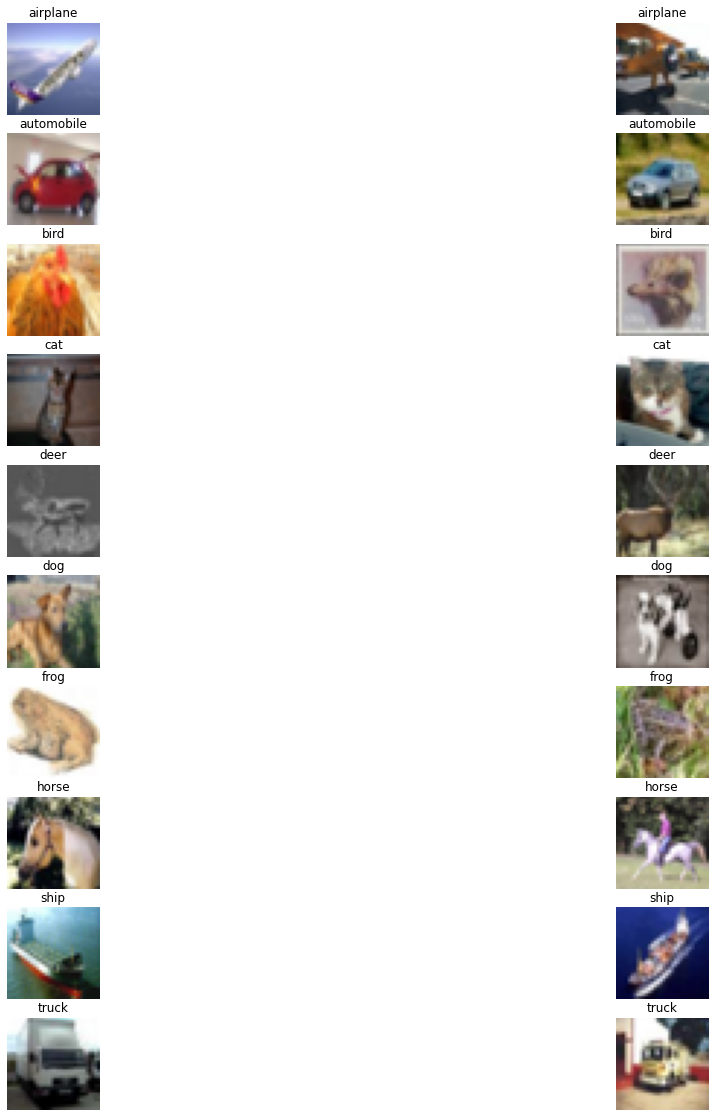

In [8]:
fig = plt.figure(figsize=(20, 20))
m,n = 10,2
subplot = 1
for i in range(m):
    for j in range(n):
        fig.add_subplot(m,n,subplot)
        subplot += 1
        index = train_data_label_indices[i][j]
        plt.imshow(train_X[index])
        plt.axis('off')
        plt.title(classes[train_y[index][0]])

## Normalise the data
** Convert the type of pixel values and compress values between 0 to 1##

In [9]:
x_train = train_X.astype('float32')
x_test = test_X.astype('float32')
x_train = x_train /255.0
x_test = x_test/255.0

In [10]:
x_train.shape

(50000, 32, 32, 3)

In [11]:
y_train = tf.keras.utils.to_categorical(train_y)
y_test = tf.keras.utils.to_categorical(test_y)

#Train a ANN model first
* First layer to flatten the input image 50000 * (32,32,3) is converted to 50000 * 3072
* Next 2 hidden layers with relu activation,l2 regularisation and 3000/1000 neurons (Relu is best suited for the hidden layer)
* Softmax is used on the output layer as it is a multiclass classification
* Stochastic gradient descent is used as the optimizer

In [12]:
ann = keras.models.Sequential()
ann.add(keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(keras.layers.Dense(3000,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))
ann.add(keras.layers.Dense(1000,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))
ann.add(keras.layers.Dense(len(y_train[0]), activation='softmax'))

#Compile the model
ann.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
#Train the model
model_ann_history = ann.fit(x_train, y_train, epochs=50, batch_size=50, verbose=2)

Epoch 1/50
1000/1000 - 9s - loss: 39.2724 - accuracy: 0.3399 - 9s/epoch - 9ms/step
Epoch 2/50
1000/1000 - 7s - loss: 26.8316 - accuracy: 0.4025 - 7s/epoch - 7ms/step
Epoch 3/50
1000/1000 - 6s - loss: 18.5491 - accuracy: 0.4207 - 6s/epoch - 6ms/step
Epoch 4/50
1000/1000 - 6s - loss: 13.0050 - accuracy: 0.4304 - 6s/epoch - 6ms/step
Epoch 5/50
1000/1000 - 5s - loss: 9.2874 - accuracy: 0.4366 - 5s/epoch - 5ms/step
Epoch 6/50
1000/1000 - 5s - loss: 6.7957 - accuracy: 0.4408 - 5s/epoch - 5ms/step
Epoch 7/50
1000/1000 - 5s - loss: 5.1269 - accuracy: 0.4443 - 5s/epoch - 5ms/step
Epoch 8/50
1000/1000 - 5s - loss: 4.0025 - accuracy: 0.4508 - 5s/epoch - 5ms/step
Epoch 9/50
1000/1000 - 5s - loss: 3.2461 - accuracy: 0.4531 - 5s/epoch - 5ms/step
Epoch 10/50
1000/1000 - 5s - loss: 2.7405 - accuracy: 0.4549 - 5s/epoch - 5ms/step
Epoch 11/50
1000/1000 - 5s - loss: 2.3953 - accuracy: 0.4586 - 5s/epoch - 5ms/step
Epoch 12/50
1000/1000 - 5s - loss: 2.1643 - accuracy: 0.4616 - 5s/epoch - 5ms/step
Epoch 13/

### Plot the accuracy and loss history per epoch

In [14]:
def plot_accuracy_history(history, title):
    plt.figure(figsize=(10,3))

    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.title('Accuracy for model1')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.title('Loss for model1')
    plt.show()

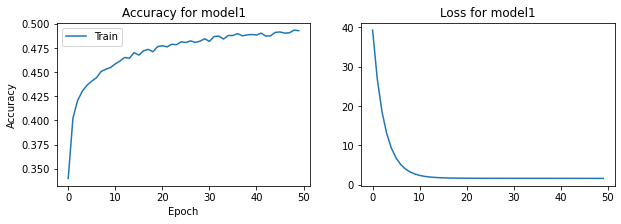

In [15]:
plot_accuracy_history(model_ann_history, 'Simple NN with 50')

## As we can see the accuracy is increasing with epochs so if we use 100 epochs then we can expect a good accuracy score but it can't go beyond a cetain point.

In [17]:
loss_ann, acc_ann = ann.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 1.6418 - accuracy: 0.4945 - 2s/epoch - 6ms/step


## We got a text set accuracy of 49%

# Print classification report and confusion matrix

In [18]:
y_pred_ann = ann.predict(x_test)

In [19]:
predicted_classes_ann = np.argmax(y_pred_ann, axis=-1)
true_classes_ann = np.argmax(y_test,axis=-1)

In [20]:
import sklearn.metrics as mtrx
print(mtrx.classification_report(true_classes_ann, predicted_classes_ann))

              precision    recall  f1-score   support

           0       0.46      0.68      0.55      1000
           1       0.63      0.64      0.63      1000
           2       0.34      0.43      0.38      1000
           3       0.46      0.15      0.23      1000
           4       0.38      0.48      0.43      1000
           5       0.47      0.34      0.39      1000
           6       0.55      0.54      0.54      1000
           7       0.59      0.52      0.55      1000
           8       0.54      0.66      0.60      1000
           9       0.58      0.51      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [21]:
print(mtrx.confusion_matrix(true_classes_ann, predicted_classes_ann))

[[675  26  53   4  38   4  16  15 138  31]
 [ 72 639  23   6  12  12  11  13  95 117]
 [131  21 433  23 184  46  69  43  33  17]
 [ 78  27 148 154 106 180 131  62  49  65]
 [ 95  15 174  15 481  22  85  69  34  10]
 [ 49  12 189  84  96 335  77  85  49  24]
 [ 26  17 124  18 177  34 537  23  24  20]
 [ 99  15  91  20 116  51  22 516  23  47]
 [160  62  17   2  26  18   2  12 663  38]
 [ 80 179  20   8  23   9  23  33 113 512]]


# Train a CNN model
#Train a ANN model first
* First layer is convolution with 32 filters and filter size (3,3)
* Second layer is max pooling on (2,2)
* Third layer is convolution with 64 filters and filter size (3,3)
* Fourth layer is max pooling on (2,2)
* Fifth  layer to flatten the input image
* Next hidden layers with relu activation,l2 regularisation and 64 neurons (Relu is best suited for the hidden layer)
* Softmax is used on the output layer as it is a multiclass classification
* Adam is used as optimiser

In [22]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn.add(keras.layers.MaxPooling2D((2,2)))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.01), bias_regularizer=keras.regularizers.l2(0.01)))
cnn.add(keras.layers.Dense(len(y_train[0]), activation='softmax'))


In [23]:
#Compile the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#Train the model
model_cnn_history = cnn.fit(x_train, y_train, epochs=50,  verbose=2)

Epoch 1/50
1563/1563 - 9s - loss: 1.6923 - accuracy: 0.4313 - 9s/epoch - 6ms/step
Epoch 2/50
1563/1563 - 7s - loss: 1.4145 - accuracy: 0.5431 - 7s/epoch - 4ms/step
Epoch 3/50
1563/1563 - 8s - loss: 1.3170 - accuracy: 0.5838 - 8s/epoch - 5ms/step
Epoch 4/50
1563/1563 - 7s - loss: 1.2538 - accuracy: 0.6049 - 7s/epoch - 4ms/step
Epoch 5/50
1563/1563 - 7s - loss: 1.2135 - accuracy: 0.6215 - 7s/epoch - 4ms/step
Epoch 6/50
1563/1563 - 6s - loss: 1.1811 - accuracy: 0.6373 - 6s/epoch - 4ms/step
Epoch 7/50
1563/1563 - 7s - loss: 1.1542 - accuracy: 0.6451 - 7s/epoch - 4ms/step
Epoch 8/50
1563/1563 - 7s - loss: 1.1303 - accuracy: 0.6555 - 7s/epoch - 4ms/step
Epoch 9/50
1563/1563 - 7s - loss: 1.1075 - accuracy: 0.6649 - 7s/epoch - 5ms/step
Epoch 10/50
1563/1563 - 7s - loss: 1.0867 - accuracy: 0.6735 - 7s/epoch - 4ms/step
Epoch 11/50
1563/1563 - 7s - loss: 1.0754 - accuracy: 0.6766 - 7s/epoch - 4ms/step
Epoch 12/50
1563/1563 - 7s - loss: 1.0543 - accuracy: 0.6866 - 7s/epoch - 4ms/step
Epoch 13/50
1

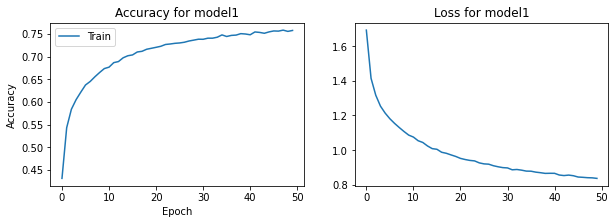

In [25]:
plot_accuracy_history(model_cnn_history, 'Simple NN with 50')

## As we can see the accuracy is increasing with epochs so if we use 100 epochs then we can expect a good accuracy.

In [26]:
loss_cnn, acc_cnn = cnn.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.9700 - accuracy: 0.7185 - 931ms/epoch - 3ms/step


## We got a test accuracy of 71%

## Print the classification report and confusion matrix

In [27]:
y_pred_cnn = cnn.predict(x_test)
predicted_classes_cnn = np.argmax(y_pred_cnn, axis=-1)
true_classes_cnn = np.argmax(y_test,axis=-1)

In [28]:
import sklearn.metrics as mtrx
print(mtrx.classification_report(true_classes_cnn, predicted_classes_cnn))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1000
           1       0.84      0.84      0.84      1000
           2       0.66      0.50      0.57      1000
           3       0.57      0.50      0.53      1000
           4       0.64      0.76      0.69      1000
           5       0.51      0.79      0.62      1000
           6       0.80      0.78      0.79      1000
           7       0.85      0.70      0.77      1000
           8       0.85      0.83      0.84      1000
           9       0.82      0.80      0.81      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [29]:
print(mtrx.confusion_matrix(true_classes_cnn, predicted_classes_cnn))

[[697  30  73  26  32  21   9  10  65  37]
 [ 20 842   6   9   1   9   6   2  18  87]
 [ 50   4 498  70 127 149  61  23   9   9]
 [ 14   6  35 498  63 287  57  18  12  10]
 [ 17   2  41  56 757  62  32  28   4   1]
 [  6   0  22  94  39 789  10  27   7   6]
 [  5   7  38  69  60  40 775   2   1   3]
 [ 10   0  20  34  80 135   6 699   6  10]
 [ 49  30  18  13  14  21   9   1 829  16]
 [ 19  77   9  12  15  21   3  15  28 801]]
